Group 5: Sam young, Raveel Tejani

# Lab Notebook 8 - SVM classification in particle physics

In this notebook we will learn about applying SVMs to a larger data set from particle physics.

_Data by [Sascha Caron](https://www.nikhef.nl/~scaron/). Modified from the Notebook by Viviana Acquaviva (2023). License: [BSD-3-clause](https://opensource.org/license/bsd-3-clause/)_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.svm import SVC, LinearSVC # New algorithm!
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, LearningCurveDisplay
from sklearn import metrics
from sklearn.model_selection import GridSearchCV # New! This will be used to explore different hyperparameter choices.

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)
rc('text', usetex=False)

## Step 1

Read in features and labels from 'ParticleID_features.csv' and 'ParticleID_labels.txt' using pandas. Read in labels from 'ParticleID_labels.txt'. Explore the data set to get an idea of what it looks like (ex: look at first few rows, shape, etc.).

In [3]:
features = pd.read_csv("ParticleID_features.csv")
labels = pd.read_csv("ParticleID_labels.txt", header=None)

In [4]:
features.head()

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,P7,P8,Type_3,P9,P10,P11,P12,Type_4,P13,P14,P15,P16,Type_5,P17,P18,P19,P20,Type_6,P21,P22,P23,P24,Type_7,P25,P26,P27,P28,Type_8,P29,P30,P31,P32,Type_9,P33,P34,P35,P36,Type_10,P37,P38,P39,P40,Type_11,P41,P42,P43,P44,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,127932.0,0.826569,2.332000,b,86788.9,84554.9,-0.180795,2.187970,j,140289.0,76955.8,-1.19933,-1.302800,m+,85230.6,70102.4,-0.645689,-1.659540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,68462.9,-2.126740,-2.582310,e-,44270.1,35139.6,-0.706120,-0.371392,e+,72883.9,26902.2,-1.65386,-3.129630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,54922.3,1.226850,0.646589,j,60768.9,36244.3,1.102890,-1.434480,j,77714.0,27801.5,1.68461,1.389690,j,26840.0,24469.3,-0.388937,-1.647260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,39472.0,-0.024646,-2.222800,j,201589.0,32978.6,-2.496040,1.137810,j,90096.7,26964.5,1.87132,0.817631,j,28235.4,25887.9,-0.411528,2.024290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,69762.1,0.774114,2.568740,j,61625.2,50086.7,0.652572,-3.012800,j,104193.0,31151.0,1.87641,0.865381,j,746585.0,26219.3,4.041820,-0.874169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
features.tail()

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,P7,P8,Type_3,P9,P10,P11,P12,Type_4,P13,P14,P15,P16,Type_5,P17,P18,P19,P20,Type_6,P21,P22,P23,P24,Type_7,P25,P26,P27,P28,Type_8,P29,P30,P31,P32,Type_9,P33,P34,P35,P36,Type_10,P37,P38,P39,P40,Type_11,P41,P42,P43,P44,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
4995,4995,269074.0,-1.274730,j,495577.0,362590.0,-0.791914,1.671250,b,328278.0,224827.0,0.922952,-1.284970,j,2628790.0,178652.0,-3.380790,2.922260,b,303713.0,156021.0,-1.284190,0.436475,j,555572.0,116170.0,2.24467,-2.07948,j,173426.0,64470.5,1.644410,2.545220,j,65465.9,53244.8,-0.660150,-0.089563,j,47959.1,47171.9,-0.100525,2.179240,j,150048.0,23931.7,2.52114,1.527640,j,82489.5,23426.6,1.92712,1.00469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4996,12385.8,0.986871,j,258932.0,133559.0,-1.276540,2.970100,j,87822.2,73895.0,0.604704,-0.646550,j,104199.0,67035.4,-1.003020,-0.909438,b,60343.9,38512.4,-1.013560,0.770876,j,55479.0,33020.8,1.10141,1.61752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,32762.8,3.057630,b,122222.0,79947.8,0.983920,-0.399231,j,260623.0,49940.6,2.334630,0.555659,j,56696.1,49853.1,0.422515,-3.014610,j,36338.9,25777.1,0.850436,0.672009,j,262419.0,25037.1,-3.03999,2.82044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,104474.0,-1.875250,b,791028.0,457589.0,1.141530,2.934810,b,304661.0,224326.0,0.793147,0.407167,j,569714.0,151015.0,2.002460,-0.778558,j,83117.9,79371.7,-0.234668,-0.225965,j,374555.0,33465.4,-3.10601,1.42607,j,31085.5,29817.5,0.290612,0.932758,j,37521.6,24471.5,0.955493,-1.282540,e-,122577.0,62144.7,-1.300900,-0.289339,m-,303878.0,49861.8,2.49372,-0.016383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4999,4999,65623.8,-0.817535,b,145360.0,138746.0,0.236765,2.277120,j,159680.0,42910.0,-1.987650,-0.873922,j,127125.0,39118.8,-1.843890,-1.635370,b,44419.6,37225.8,-0.577472,-0.101245,j,55611.1,34467.7,1.05711,1.89663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
labels.tail()

,0
4995,4top
4996,ttbar
4997,ttbar
4998,4top
4999,ttbar


## Step 2

The labels are in the form 'ttbar' and '4top'. Turn these categorical (string-type) labels into an array of zeros and ones, where 'ttbar'=0 and '4top'=1 using 'LabelEncoder' from sklearn.preprocessing. Call this new array "target".

In [7]:
labels.loc[ labels[0] == 'ttbar', 0] = 0
labels.loc[ labels[0] == '4top', 0] = 1
labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
labels.tail()

,0
4995,1
4996,0
4997,0
4998,1
4999,0


In [9]:
target = labels.to_numpy()
target = target.T[0] #converting from column array to row array
target = np.int64(target) #metrics cares about this
target

array([0, 0, 0, ..., 0, 1, 0])

## Step 3

Using describe() on features, look at the "count" row. Some columns only contain fractions of the total number of data set rows, due to the variable number of products in each collision

In [10]:
features.describe()

,ID,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,4.997000e+03,4.997000e+03,4997.000000,4997.000000,4.950000e+03,4950.000000,4950.000000,4950.000000,4.717000e+03,4717.000000,4717.000000,4717.000000,4.002000e+03,4002.000000,4002.000000,4002.000000,2.871000e+03,2871.00000,2871.000000,2871.000000,1.889000e+03,1889.000000,1889.000000,1889.000000,1.186000e+03,1186.000000,1186.000000,1186.000000,7.290000e+02,729.000000,729.000000,729.000000,4.420000e+02,442.000000,442.000000,442.000000,2.610000e+02,261.000000,261.000000,261.000000,1.270000e+02,127.000000,127.000000,127.000000,5.600000e+01,56.000000,56.000000,56.000000
mean,2499.500000,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.527799e+05,1.080302e+05,-0.029936,0.007327,2.117980e+05,74863.343131,-0.025104,0.011845,1.805997e+05,57289.049481,0.010723,0.045266,1.780366e+05,48798.018516,0.015167,-0.031312,1.705620e+05,44042.67015,-0.022948,0.014522,1.628825e+05,41151.069666,0.002228,0.006738,1.581409e+05,40250.387015,0.072349,-0.035907,1.596814e+05,40139.289849,0.061654,-0.045868,1.574039e+05,39703.038235,0.118543,0.024249,1.561160e+05,38173.716092,0.029455,0.026422,1.631051e+05,34876.849606,0.206978,-0.001085,1.456600e+05,36151.183929,-0.000879,0.219260
std,1443.520003,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638580e+05,8.136261e+04,1.439105,1.828832,2.510361e+05,46309.512365,1.577316,1.802715,2.383403e+05,32013.857623,1.634072,1.812078,2.577958e+05,26252.978520,1.744489,1.784248,2.381745e+05,23510.65367,1.806611,1.811101,2.269341e+05,20988.953157,1.815312,1.771888,2.118782e+05,26556.025657,1.836492,1.796932,2.308620e+05,30074.756789,1.842798,1.788596,2.165489e+05,30502.312276,1.872084,1.826435,2.319016e+05,29324.658352,1.884750,1.753017,2.248603e+05,20433.767238,1.998859,1.949004,1.943657e+05,25861.883410,1.941707,1.910400
min,0.000000,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,1.087540e+04,1.080000e+04,-4.668790,-3.140530,1.221050e+04,10639.800000,-4.520250,-3.141480,1.169190e+04,10818.000000,-4.616550,-3.136130,1.110310e+04,10287.000000,-4.778980,-3.139040,1.070330e+04,10066.90000,-4.930230,-3.140380,1.197700e+04,11260.200000,-4.758150,-3.135630,1.380860e+04,10973.300000,-4.606330,-3.132610,1.119760e+04,10067.900000,-4.814380,-3.136380,1.615530e+04,10183.700000,-4.803880,-3.135910,2.004750e+04,14800.200000,-4.400470,-3.130690,1.780380e+04,12987.900000,-4.447660,-3.139820,2.512510e+04,14836.000000,-4.448760,-2.990730
25%,1249.750000,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007510e+05,6.321840e+04,-1.060500,-1.602460,7.636905e+04,46549.475000,-1.125620,-1.547418,5.999090e+04,36097.700000,-1.121240,-1.518030,5.278370e+04,30891.650000,-1.198468,-1.550615,5.007050e+04,28453.95000,-1.250050,-1.586675,4.695560e+04,27963.500000,-1.231420,-1.475380,4.535515e+04,27140.550000,-1.243962,-1.626688,4.387110e+04,26825.000000,-1.226980,-1.513330,4.410735e+04,26589.250000,-1.223240,-1.422415,4.092160e+04,25298.300000,-1.413650,-1.270700,4.365005e+04,24742.500000,-1.259230,-1.817600,4.112588e+04,24974.125000,-1.243362,-1.490900
50%,2499.500000,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.659740e+05,8.584360e+04,-0.057428,0.015111,1.288565e+05,62498.400000,-0.040648,0.034238,9.922610e+04,48949.200000,-0.035512,0.060279,9.206885e+04,41054.850000,0.054393,-0.079641,8.593460e+04,37378.30000,-0.046667,0.040528,7.975460e+04,34681.700000,0.025305,0.046141,8.315485e+04,33683.550000,0.156083,-0.015617,7.894980e+04,33328.000000,0.072709,-0.052590,7.609735e+04,30942.700000,0.035675,0.090282,7.568430e+04,29479.700000,-0.088908,-0.041002,8.050910e+04,28262.800000,0.120301,-0.232455,9.553645e+04,27353.550000,-0.121213,0.128103
75%,

Therefore, we will consider a subset of the data, so we have limited imputing/manipulation problems. Define "features_lim" as the new limited data set: it only contains the columns 

'MET', 'METphi', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12',  'P13', 'P14', 'P15', and 'P16'
       
There may still be some columns with NaN values, so replace NaN with 0 for the moment.

In [11]:
features_lim = features[['MET', 'METphi', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
                         'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15','P16']]

features_lim = features_lim.fillna(0)
features_lim.head()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
0,62803.5,-1.810010,137571.0,128444.0,-0.345744,-0.307112,174209.0,127932.0,0.826569,2.332000,86788.9,84554.9,-0.180795,2.187970,140289.0,76955.8,-1.19933,-1.302800
1,57594.2,-0.509253,161529.0,80458.3,-1.318010,1.402050,291490.0,68462.9,-2.126740,-2.582310,44270.1,35139.6,-0.706120,-0.371392,72883.9,26902.2,-1.65386,-3.129630
2,82313.3,1.686840,167130.0,113078.0,0.937258,-2.068680,102423.0,54922.3,1.226850,0.646589,60768.9,36244.3,1.102890,-1.434480,77714.0,27801.5,1.68461,1.389690
3,30610.8,2.617120,112267.0,61383.9,-1.211050,-1.457800,40647.8,39472.0,-0.024646,-2.222800,201589.0,32978.6,-2.496040,1.137810,90096.7,26964.5,1.87132,0.817631
4,45153.1,-2.241350,178174.0,100164.0,1.166880,-0.018721,92351.3,69762.1,0.774114,2.568740,61625.2,50086.7,0.652572,-3.012800,104193.0,31151.0,1.87641,0.865381


**Note:** replacing NaN with 0 is the simplest but worst possible choice - imputing a constant value skews the model. One step up would be to input the mean or median for each column. However, because only a limited number of instances have missing data, the choice of imputing strategy doesn't matter too much.

Use "describe()" to confirm that the count is the same for all features:

In [12]:
features_lim.tail()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
4995,269074.0,-1.274730,495577.0,362590.0,-0.791914,1.671250,328278.0,224827.0,0.922952,-1.284970,2628790.0,178652.0,-3.380790,2.922260,303713.0,156021.0,-1.284190,0.436475
4996,12385.8,0.986871,258932.0,133559.0,-1.276540,2.970100,87822.2,73895.0,0.604704,-0.646550,104199.0,67035.4,-1.003020,-0.909438,60343.9,38512.4,-1.013560,0.770876
4997,32762.8,3.057630,122222.0,79947.8,0.983920,-0.399231,260623.0,49940.6,2.334630,0.555659,56696.1,49853.1,0.422515,-3.014610,36338.9,25777.1,0.850436,0.672009
4998,104474.0,-1.875250,791028.0,457589.0,1.141530,2.934810,304661.0,224326.0,0.793147,0.407167,569714.0,151015.0,2.002460,-0.778558,83117.9,79371.7,-0.234668,-0.225965
4999,65623.8,-0.817535,145360.0,138746.0,0.236765,2.277120,159680.0,42910.0,-1.987650,-0.873922,127125.0,39118.8,-1.843890,-1.635370,44419.6,37225.8,-0.577472,-0.101245


In [13]:
features_lim.describe()

,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.526283e+05,1.079653e+05,-0.029918,0.007323,2.096800e+05,74114.709700,-0.024853,0.011727,1.703778e+05,54046.489280,0.010116,0.042704
std,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638514e+05,8.138121e+04,1.438673,1.828283,2.506651e+05,46675.655162,1.569410,1.793678,2.352279e+05,33795.723384,1.587146,1.760070
min,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,0.000000e+00,0.000000e+00,-4.668790,-3.140530,0.000000e+00,0.000000,-4.520250,-3.141480,0.000000e+00,0.000000,-4.616550,-3.136130
25%,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007050e+05,6.320943e+04,-1.059270,-1.599617,7.488228e+04,46165.375000,-1.108390,-1.532478,5.480870e+04,33959.400000,-1.050477,-1.424080
50%,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.658985e+05,8.581595e+04,-0.056810,0.012737,1.277135e+05,62167.100000,-0.023321,0.006687,9.259335e+04,47278.800000,0.000000,0.000000
75%,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999058e+05,1.238520e+05,1.028055,1.601880,2.406498e+05,89065.300000,1.048617,1.553310,1.831228e+05,66846.300000,1.085627,1.521765
max,692674.000000,3.141130,3.186360e+06,1.276710e+06,4.141410,3.138540,3.587700e+06,1.146330e+06,4.559150,3.139200,2.800410e+06,788338.000000,4.798090,3.139020,2.503590e+06,481884.000000,4.730480,3.139660


## Step 4: labels and benchmarking

What percentage of the data has the negative label (0) versus the positive label (1)? What is the accuracy of a classifier that puts everything in the negative class?

- accuracy would be equivalent to the percentage of data that has the negative label (seen below)

In [14]:
pos_percent = np.sum(target)/len(target)
neg_percent = 1 - pos_percent
print("data with negative label (0): {:.2f} %".format(neg_percent * 100))
print("data with positive label (1): {:.2f} %".format(pos_percent * 100))

accuracy = metrics.accuracy_score(target, np.zeros(len(target)))
print("accuracy if all negative class: {:.2f} %".format(accuracy * 100))

data with negative label (0): 83.78 %
data with positive label (1): 16.22 %
accuracy if all negative class: 83.78 %


For contrast, a random classifier that just assigns a random value according to class distribution has the following accuracy:

In [15]:

from numpy.random import choice
draw = choice([0,1], len(target), p=[neg_percent, pos_percent])

accuracy = metrics.accuracy_score(target, draw)
print("accuracy if random value according to class distribution: {:.2f} %".format(accuracy * 100))

accuracy if random value according to class distribution: 72.52 %


## Step 5: Let's start with a linear model; model = LinearSVC()

1. Define a benchmark linear model, "bmodel", using LinearSVC(dual=False).

2. Use "StratifiedKFold" with 5 splits, shuffle set to True, and a random state of 101 to produce a cross-validation object, "cv".

3. Run "cross_validate", where scoring = 'accuracy' and return_train_score=True. This will output the fit time, the score time, the test score, and the train score. Print these.

4. Print the mean and standard deviation of the test_score.

In [16]:
bmodel = LinearSVC(dual = False)
cv = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 101)
metrics = cross_validate(bmodel, features_lim, target, cv=cv, return_train_score = True)
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))
print('train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))

test score: mean = 0.832, std = 0.0054
train score: mean = 0.832, std = 0.0005


## Step 6

Technically, standardizing/normalizing data using the entire learning set introduces leakage between train and test set (the test set "knows" about the mean and standard deviation of the entire data set). Usually this is not a dramatic effect, but the correct procedure is to derive the scaler within each CV fold (i.e. after separating in train and test), only on the train set, and apply the same transformation to the test set. The model then becomes a pipeline.

Similar to lab 5-6, set up a pipeline with StandardScaler and LinearSVC(dual=False,C=1000), use it in cross_validate and report the results. For the test and train scores, print the mean and standard deviation:

In [17]:
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
bmodel = LinearSVC(dual = False, C = 1000)
pipeline = Pipeline([('transformer', scaler), ('estimator', bmodel)]) 
metrics = cross_validate(pipeline, features_lim, target, cv=cv, return_train_score = True)
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))
print('train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))

test score: mean = 0.893, std = 0.0035
train score: mean = 0.895, std = 0.0018


For the test and train scores of benchmark_lim_piped, print the mean and standard deviation:

In [18]:
## same as above?

This should show a significant improvement, and the comparison between test and train scores tells us already something about the problem that we have. We can formalize this by looking at the learning curves, which tell us both about gap between train/test scores, AND whether we need more data.

## Step 7: Learning Curves

As in lab 5-6, construct the learning curve (you can recycle code). What does it tell you? 

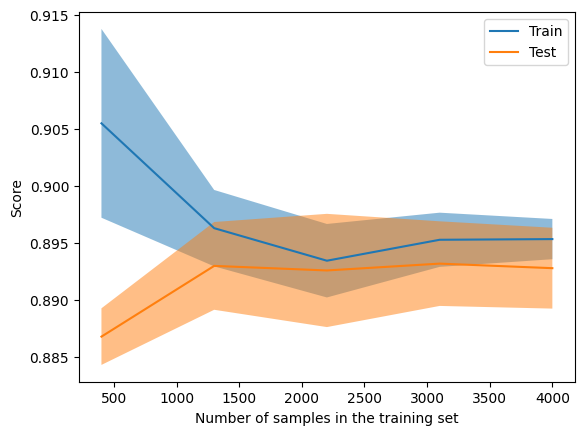

In [19]:
LearningCurveDisplay.from_estimator(pipeline, features_lim, target, cv=cv)
plt.show()

Is there anything we can conclude from this graph?

**after roughly 1000 samples in the training set, there is no further improvement by increasing the number of samples**

**our model shows low variance**

**to increase our score we need to focus on reducing the high bias, which we do later by engineering additional features**

## Step 8: Parameter optimization via cross-validation

When we optimize parameters with a grid search, we choose the parameters that give the best test scores. This is different from what would happen with new data - to do this fairly, at no point of the training procedure we are allowed to look at the test labels. Therefore, we would need to do <b> nested cross validation </b> to avoid leakage between the parameter optimization and the cross validation procedure and properly evaluate the generalization error. For now, we are just looking for the best model so "simple" CV is sufficient.

In [20]:
# Given:
from sklearn.pipeline import make_pipeline
piped_model = make_pipeline(StandardScaler(), SVC()) #now using the general SVC so I can change the kernel
piped_model.get_params() #this shows how we can access parameters both for the scaler and the classifier

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

We can define a dictionary of parameter values to run the optimization. 

Note that this might take awhile (5-15 minutes); the early estimates output by this cell may be misleading because more complex models (in particular high gamma) take longer.

Once you run this cell, the "model" object will have attributes "best_score_", "best_params_" and "best_estimator_", which give us access to the optimal estimator (printed out), as well as "cv_results_" that can be used to visualize the performance of all models.

In [21]:
# Given:

#optimizing SVC: THIS IS NOT YET NESTED CV

parameters = {'svc__kernel':['poly', 'rbf'], \
              'svc__gamma':['scale', 0.01, 0.1], 'svc__C':[0.1, 1.0, 10.0, 100.0], \
              'svc__degree': [2, 4]}

model = GridSearchCV(piped_model, parameters, cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 4, n_jobs = -1, return_train_score=True)

model.fit(features_lim,target)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params, best score: 0.8952 {'svc__C': 10.0, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [22]:
save_model = model

## Step 9

Next, we visualize the models in a pandas data frame, and rank them according to their test scores.

You may find it useful to look at: 
1. the mean and std of the test scores
2. the mean of the train scores (to evaluate if they differ and the significance of the result)
3. fitting time (we can pick a faster model instead of the best model if the scores are comparable)!

Let "scores_lim" be the dataframe containing "model.cv_results_". Print the columns.

In [23]:
scores_lim = pd.DataFrame.from_dict(model.cv_results_)
scores_lim.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'param_svc__degree', 'param_svc__gamma',
       'param_svc__kernel', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

Next, in "scores_lim", sort the columns 'params','mean_test_score','std_test_score','mean_train_score', and 'mean_fit_time' by descending 'mean_test_score':

In [24]:
scores_lim.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.263051,0.024627,0.050245,0.008930,0.1,2,scale,poly,"{'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.873,0.874,0.865,0.866,0.868,0.8692,0.003655,30,0.86875,0.87000,0.87175,0.87075,0.87350,0.87095,0.001608
1,0.292002,0.018601,0.178175,0.024742,0.1,2,scale,rbf,"{'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}",0.892,0.889,0.873,0.878,0.888,0.8840,0.007239,11,0.88725,0.89050,0.89125,0.89300,0.88850,0.89010,0.002029
2,0.236552,0.014676,0.047692,0.005883,0.1,2,0.01,poly,"{'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'poly'}",0.851,0.851,0.847,0.845,0.847,0.8482,0.002400,46,0.84850,0.84700,0.85100,0.84850,0.85100,0.84920,0.001568
3,0.270600,0.013902,0.166686,0.003909,0.1,2,0.01,rbf,"{'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}",0.887,0.884,0.882,0.879,0.884,0.8832,0.002638,13,0.88450,0.88425,0.88400,0.88525,0.88625,0.88485,0.000815
4,0.241755,0.005813,0.039638,0.003317,0.1,2,0.1,poly,"{'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}",0.882,0.877,0.866,0.878,0.875,0.8756,0.005314,26,0.87500,0.87750,0.87950,0.87675,0.88000,0.87775,0.001830


In [25]:
scores_lim = scores_lim.sort_values('mean_test_score', ascending = False)
scores_lim.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
33,0.261992,0.013809,0.128644,0.002095,10.0,4,0.01,rbf,"{'svc__C': 10.0, 'svc__degree': 4, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}",0.903,0.894,0.896,0.897,0.886,0.8952,0.005492,1,0.9135,0.91050,0.91375,0.91200,0.91300,0.91255,0.001187
27,0.271722,0.005715,0.134989,0.001682,10.0,2,0.01,rbf,"{'svc__C': 10.0, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}",0.903,0.894,0.896,0.897,0.886,0.8952,0.005492,1,0.9135,0.91050,0.91375,0.91200,0.91300,0.91255,0.001187
15,0.237646,0.013968,0.147910,0.014559,1.0,2,0.01,rbf,"{'svc__C': 1.0, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}",0.902,0.894,0.895,0.889,0.893,0.8946,0.004224,3,0.8995,0.89825,0.90125,0.90125,0.90075,0.90020,0.001166
21,0.236041,0.005364,0.135656,0.006368,1.0,4,0.01,rbf,"{'svc__C': 1.0, 'svc__degree': 4, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}",0.902,0.894,0.895,0.889,0.893,0.8946,0.004224,3,0.8995,0.89825,0.90125,0.90125,0.90075,0.90020,0.001166
13,0.288207,0.018601,0.161894,0.002077,1.0,2,scale,rbf,"{'svc__C': 1.0, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}",0.899,0.893,0.892,0.892,0.886,0.8924,0.004128,5,0.9215,0.91750,0.92450,0.92300,0.92450,0.92220,0.002600


To build some intuition around the results, I find it helpful to ask: what hyperparameter values are common to all the best-performing models? Here, for example, the rbf kernel seems to be constantly preferred, while the values of C and gamma seem to only affect the scores only mildly. Note also that the Grid Search is insensitive to moot parameters combinations; for example, here the first three models are identical, because the degree of the polynomial kernel does not matter when using an rbf kernel. This is less than ideal, of course.

### Final diagnosis 

The problem here is high bias, which is not that surprising given that we are using only a subset of features.

We can try two things: making up new features which might help, based on what we know about the problem, and using an imputing strategy to include information about the discarded features.

### Step 10: Improve the model. 

In order to include additional features, use .fillna(0) to replace all nan with zero, and .replace('',0) to replace empty string values. Check the result.

In [26]:
features = features.fillna(0)
features = features.replace('',0)
features.describe()

,ID,MET,METphi,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2499.500000,64071.074332,-0.028916,3.301357e+05,1.540486e+05,-0.039812,-0.003049,2.526283e+05,1.079653e+05,-0.029918,0.007323,2.096800e+05,74114.709700,-0.024853,0.011727,1.703778e+05,54046.489280,0.010116,0.042704,1.425005e+05,39057.934020,0.012140,-0.025062,9.793672e+04,25289.301200,-0.013177,0.008339,6.153702e+04,15546.87412,0.000842,0.002545,3.751102e+04,9547.391800,0.017161,-0.008517,2.328155e+04,5852.308460,0.008989,-0.006688,1.391450e+04,3509.748580,0.010479,0.002144,8.149253e+03,1992.667980,0.001538,0.001379,4.142869e+03,885.871980,0.005257,-0.000028,1.631392e+03,404.893260,-0.000010,0.002456
std,1443.520003,60525.122480,1.819257,3.068202e+05,1.149469e+05,1.361762,1.814855,2.638514e+05,8.138121e+04,1.438673,1.828283,2.506651e+05,46675.655162,1.569410,1.793678,2.352279e+05,33795.723384,1.587146,1.760070,2.413624e+05,30530.754194,1.560681,1.596288,1.992033e+05,28137.109217,1.368922,1.372297,1.602738e+05,23759.72563,1.115606,1.088924,1.231563e+05,21456.079083,0.894672,0.875015,1.045843e+05,18232.343896,0.703574,0.682745,7.831865e+04,14461.385282,0.557054,0.542522,6.327000e+04,10809.108843,0.429882,0.399832,4.396717e+04,6375.089165,0.319008,0.309426,2.550795e+04,4672.794272,0.203668,0.201709
min,0.000000,290.756000,-3.141010,3.857940e+04,2.825400e+04,-4.110220,-3.140710,0.000000e+00,0.000000e+00,-4.668790,-3.140530,0.000000e+00,0.000000,-4.520250,-3.141480,0.000000e+00,0.000000,-4.616550,-3.136130,0.000000e+00,0.000000,-4.778980,-3.139040,0.000000e+00,0.000000,-4.930230,-3.140380,0.000000e+00,0.00000,-4.758150,-3.135630,0.000000e+00,0.000000,-4.606330,-3.132610,0.000000e+00,0.000000,-4.814380,-3.136380,0.000000e+00,0.000000,-4.803880,-3.135910,0.000000e+00,0.000000,-4.400470,-3.130690,0.000000e+00,0.000000,-4.447660,-3.139820,0.000000e+00,0.000000,-4.448760,-2.990730
25%,1249.750000,24352.375000,-1.619905,1.369522e+05,8.883690e+04,-1.035570,-1.574213,1.007050e+05,6.320943e+04,-1.059270,-1.599617,7.488228e+04,46165.375000,-1.108390,-1.532478,5.480870e+04,33959.400000,-1.050477,-1.424080,3.199550e+04,24749.850000,-0.841946,-1.203655,0.000000e+00,0.000000,-0.345776,-0.416750,0.000000e+00,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2499.500000,46814.400000,-0.055612,2.263525e+05,1.182015e+05,-0.038731,-0.009037,1.658985e+05,8.581595e+04,-0.056810,0.012737,1.277135e+05,62167.100000,-0.023321,0.006687,9.259335e+04,47278.800000,0.000000,0.000000,6.994990e+04,35691.850000,0.000000,0.000000,3.679670e+04,25597.300000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,3749.250000,83032.350000,1.537323,4.077158e+05,1.771265e+05,0.943598,1.542370,2.999058e+05,1.238520e+05,1.028055,1.6018

#### Let's start by looking at what kind of particles we have as a product of the collision.

In [27]:
np.unique(np.array([features['Type_'+str(i)].values for i in range(1,14)]).astype('str'))

array(['0', 'b', 'e+', 'e-', 'g', 'j', 'm+', 'm-'], dtype='<U2')

#### Here are the proposed new features (justification can be found in Chapter 4).
    
    1. The total number of particles produced
    2. The total number of b jets
    3. The total number of jets
    4. The total number of leptons (electrons, positron, mu+, mu-)

In [28]:
#count number of non-zero types 

ntot = np.array([-(np.sum(np.array([features['Type_'+str(i)].values[j] == 0 for i in range(1,14)])) - 13) for j in range(features.shape[0])])

In [29]:
#count number of b jets 

nbtot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'b' for i in range(1,14)])) for j in range(features.shape[0])])

In [30]:
#Actually, let's count all types (jets, photons g, e-, e+, mu-, mu+)

njtot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'j' for i in range(1,14)])) for j in range(features.shape[0])])

In [31]:
ngtot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'g' for i in range(1,14)])) for j in range(features.shape[0])])

In [32]:
n_el_tot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'e-' for i in range(1,14)])) for j in range(features.shape[0])])

In [33]:
n_pos_tot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'e+' for i in range(1,14)])) for j in range(features.shape[0])])

In [34]:
n_muneg_tot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'm-' for i in range(1,14)])) for j in range(features.shape[0])])

In [35]:
n_mupos_tot = np.array([np.sum(np.array([features['Type_'+str(i)].values[j] == 'm+' for i in range(1,14)])) for j in range(features.shape[0])])

In [36]:
n_lepton_tot = n_el_tot + n_pos_tot + n_muneg_tot + n_mupos_tot

Add these new features to the dataset and check the result. How many features are there now?

In [37]:
features.head()

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,P7,P8,Type_3,P9,P10,P11,P12,Type_4,P13,P14,P15,P16,Type_5,P17,P18,P19,P20,Type_6,P21,P22,P23,P24,Type_7,P25,P26,P27,P28,Type_8,P29,P30,P31,P32,Type_9,P33,P34,P35,P36,Type_10,P37,P38,P39,P40,Type_11,P41,P42,P43,P44,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52
0,0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,127932.0,0.826569,2.332000,b,86788.9,84554.9,-0.180795,2.187970,j,140289.0,76955.8,-1.19933,-1.302800,m+,85230.6,70102.4,-0.645689,-1.659540,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,68462.9,-2.126740,-2.582310,e-,44270.1,35139.6,-0.706120,-0.371392,e+,72883.9,26902.2,-1.65386,-3.129630,0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,54922.3,1.226850,0.646589,j,60768.9,36244.3,1.102890,-1.434480,j,77714.0,27801.5,1.68461,1.389690,j,26840.0,24469.3,-0.388937,-1.647260,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,39472.0,-0.024646,-2.222800,j,201589.0,32978.6,-2.496040,1.137810,j,90096.7,26964.5,1.87132,0.817631,j,28235.4,25887.9,-0.411528,2.024290,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,69762.1,0.774114,2.568740,j,61625.2,50086.7,0.652572,-3.012800,j,104193.0,31151.0,1.87641,0.865381,j,746585.0,26219.3,4.041820,-0.874169,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [38]:
features['ntot'] = ntot
features['nbtot'] = nbtot
features['njtot'] = njtot
features['ngtot'] = ngtot
features['n_lepton_tot'] = n_lepton_tot
features.head()

,ID,MET,METphi,Type_1,P1,P2,P3,P4,Type_2,P5,P6,P7,P8,Type_3,P9,P10,P11,P12,Type_4,P13,P14,P15,P16,Type_5,P17,P18,P19,P20,Type_6,P21,P22,P23,P24,Type_7,P25,P26,P27,P28,Type_8,P29,P30,P31,P32,Type_9,P33,P34,P35,P36,Type_10,P37,P38,P39,P40,Type_11,P41,P42,P43,P44,Type_12,P45,P46,P47,P48,Type_13,P49,P50,P51,P52,ntot,nbtot,njtot,ngtot,n_lepton_tot
0,0,62803.5,-1.810010,j,137571.0,128444.0,-0.345744,-0.307112,j,174209.0,127932.0,0.826569,2.332000,b,86788.9,84554.9,-0.180795,2.187970,j,140289.0,76955.8,-1.19933,-1.302800,m+,85230.6,70102.4,-0.645689,-1.659540,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,5,1,3,0,1
1,1,57594.2,-0.509253,j,161529.0,80458.3,-1.318010,1.402050,j,291490.0,68462.9,-2.126740,-2.582310,e-,44270.1,35139.6,-0.706120,-0.371392,e+,72883.9,26902.2,-1.65386,-3.129630,0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,4,0,2,0,2
2,2,82313.3,1.686840,b,167130.0,113078.0,0.937258,-2.068680,j,102423.0,54922.3,1.226850,0.646589,j,60768.9,36244.3,1.102890,-1.434480,j,77714.0,27801.5,1.68461,1.389690,j,26840.0,24469.3,-0.388937,-1.647260,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,5,1,4,0,0
3,3,30610.8,2.617120,j,112267.0,61383.9,-1.211050,-1.457800,b,40647.8,39472.0,-0.024646,-2.222800,j,201589.0,32978.6,-2.496040,1.137810,j,90096.7,26964.5,1.87132,0.817631,j,28235.4,25887.9,-0.411528,2.024290,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,5,1,4,0,0
4,4,45153.1,-2.241350,j,178174.0,100164.0,1.166880,-0.018721,j,92351.3,69762.1,0.774114,2.568740,j,61625.2,50086.7,0.652572,-3.012800,j,104193.0,31151.0,1.87641,0.865381,j,746585.0,26219.3,4.041820,-0.874169,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,5,0,5,0,0


In [39]:
'number of features: {}'.format(len(features.columns))

'number of features: 73'

### Feature engineering: impact of ad-hoc variables

Define 'features_lim_2' as the original 'features_lim' plus the new five hand-crafted features. Apply the piped model (StandardScaler plus LinearSVC) to this new dataset via cross_validate. Compute the mean and standard deviation of the test scores. Any improvements?

 **- huge improvement!** 

In [40]:
features_lim_2 = features_lim
features_lim_2['ntot'] = ntot
features_lim_2['nbtot'] = nbtot
features_lim_2['njtot'] = njtot
features_lim_2['ngtot'] = ngtot
features_lim_2['n_lepton_tot'] = n_lepton_tot

In [41]:
scaler = StandardScaler()
bmodel = LinearSVC(dual = False, C = 1000)
pipeline = Pipeline([('transformer', scaler), ('estimator', bmodel)]) 
metrics = cross_validate(pipeline, features_lim_2, target, cv=cv, return_train_score = True)
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))
print('train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))

test score: mean = 0.948, std = 0.0081
train score: mean = 0.951, std = 0.0025


Note: Knowledge-informed feature engineering is often very successful, more than hyperparameter optimization. Machine learning methods are often tooted for their ability to learn relevant representations, but non-deep-learning methods are less capable to do so, and providing informative features is very helpful.

We can optimize this model as well; it will take a while, just like the previous time.

In [42]:
#optimizing SVC: Takes a few minutes!
piped_model = make_pipeline(StandardScaler(), SVC())

parameters = {'svc__kernel':['poly', 'rbf'], \
              'svc__gamma':['scale', 0.01, 0.1], 'svc__C':[0.1, 1.0, 10.0], 'svc__degree': [2, 4, 8]}

nmodels = np.product([len(el) for el in parameters.values()])
model = GridSearchCV(piped_model, parameters, cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 2, n_jobs = -1, return_train_score=True)
model.fit(features_lim_2,target)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params, best score: 0.9468 {'svc__C': 1.0, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


### Take-home message: feature engineering often works best if we use subject matter knowledge, and building more features is not necessarily better.